# S-curves
Explaining how to go from pulse-height measurements to characterisation of the gain and efficiency of a PMT (or pixel of an MAPMT).

In [290]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import seaborn as sns

plt.style.use('minimalist')
color = plt.cm.viridis(0.1)

### QDC counts vs. time

In [329]:
N = 400
time = np.linspace(0, 100, N)
noise = np.random.normal(0, 1, N)
signal = (30*norm(loc=15, scale=2).pdf(time) 
          + 30*norm(loc=85, scale=2.3).pdf(time) 
          + 30*norm(loc=50, scale=2.7).pdf(time))

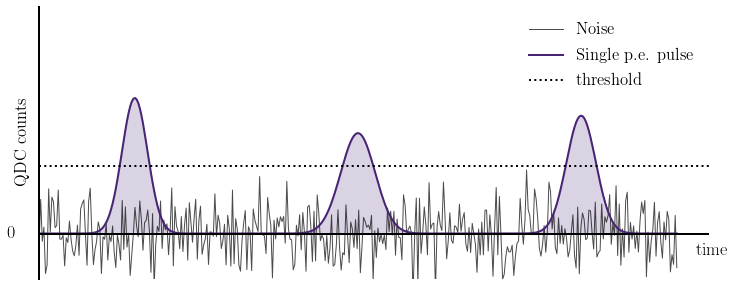

In [330]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.plot(time, noise, lw=1, color='k', alpha=0.7, label='Noise')
ax.plot(time, signal,lw=2, color=color, label='Single p.e. pulse')
ax.fill_between(time, signal, np.tile(0, N), color=color, alpha=0.2)
ax.axhline(0, color='k', lw=2)
ax.spines['bottom'].set_visible(0)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, 105)
ax.set_ylim(-2, 10)
ax.text(103, -1, 'time', fontsize=18)
ax.text(-5, -0.2, '0', fontsize=18)
ax.set_ylabel('QDC counts', labelpad=10)
ax.axhline(3, lw=2, linestyle=":", label='threshold')
ax.legend()
fig.savefig('figures/qdc_vs_time.pdf', dpi=500, bbox_inches='tight')

## Single photoelectron spectrum

In [324]:
noise = np.random.normal(0, 1, 10000)
pulse = np.random.normal(5, 1.5, 2500)
bins = np.linspace(-1, 12)

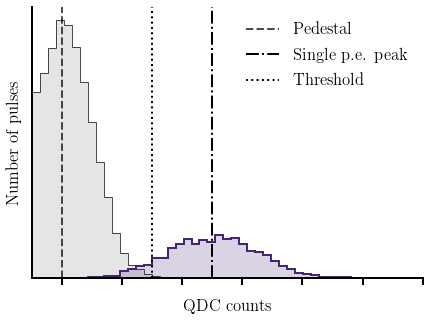

In [326]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.hist(noise, bins=bins, color='k', alpha=0.1)
ax.hist(noise, bins=bins, color='k', alpha=0.7, histtype='step', lw=1, )
ax.axvline(0, color='k', label='Pedestal', alpha=0.7, linestyle='--')
ax.hist(pulse, bins=bins, color=color, alpha=0.2)
ax.hist(pulse, bins=bins, color=color, histtype='step', lw=2)
ax.axvline(5, label='Single p.e. peak', linestyle='-.', LW=2)
ax.axvline(3, lw=2, color='k', linestyle=':', label='Threshold')
ax.legend()
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_xlabel('QDC counts', labelpad=10)
ax.set_ylabel('Number of pulses', labelpad=10)
fig.savefig('figures/single_pe_spectrum.pdf', dpi=500, bbox_inches='tight')

## S-curve

In [327]:
counts = np.concatenate([noise, pulse])
color2 = 'k'

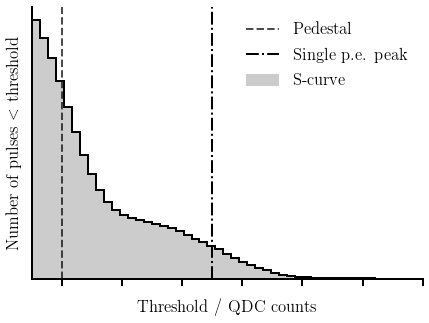

In [328]:
fig, ax = plt.subplots()
ax.hist(counts, cumulative=-1, bins=bins, histtype='step', color=color2, lw=2)
ax.hist(counts, cumulative=-1, bins=bins, alpha=0.2, color=color2, label='S-curve')
ax.axvline(0, color='k', label='Pedestal', alpha=0.7, linestyle='--', lw=2)
ax.axvline(5, color='k', label='Single p.e. peak', linestyle='-.', lw=2)
ax.legend()
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_xlabel('Threshold / QDC counts', labelpad=10)
ax.set_ylabel('Number of pulses $<$ threshold', labelpad=10)
fig.savefig('figures/explain_scurve.pdf', dpi=500, bbox_inches='tight')